Missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000 

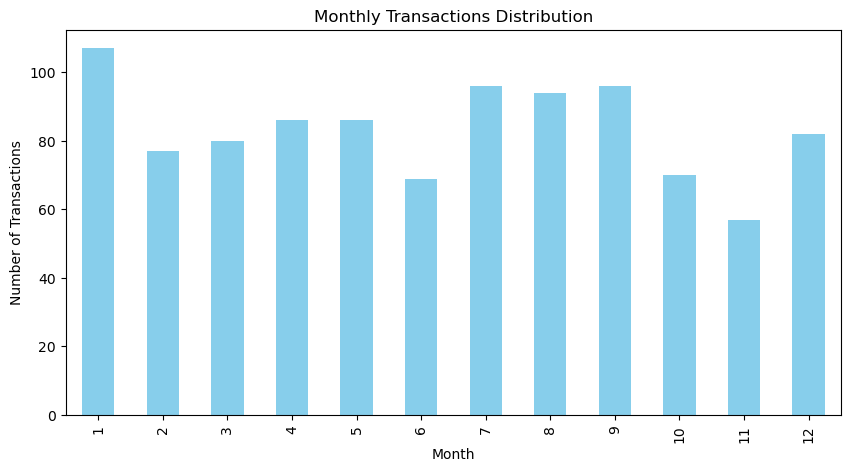

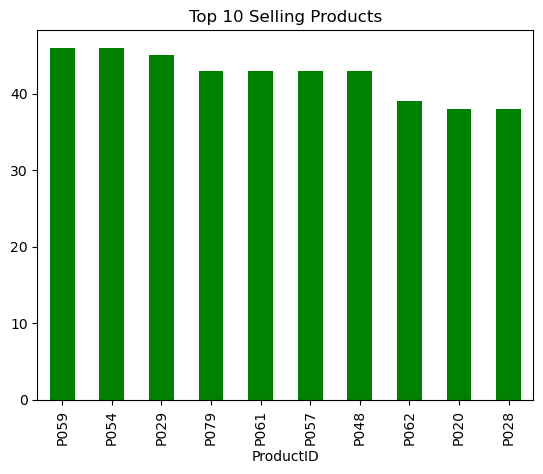

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert dates to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Check for missing values
print("Missing values:\n", customers.isnull().sum(), "\n", products.isnull().sum(), "\n", transactions.isnull().sum())

# Basic statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Transactions over time
plt.figure(figsize=(10,5))
transactions["TransactionDate"].dt.month.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Monthly Transactions Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

# Top-selling products
top_products = transactions.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", color="green")
plt.title("Top 10 Selling Products")
plt.show()
